In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extractBlocks(mag, ang, blockSize, stride):
    """
    Divide la imagen en bloques y extrae la magnitud y el ángulo del gradiente para cada bloque.
    
    :param mag: 2D numpy array de magnitudes de gradiente.
    :param ang: 2D numpy array de ángulos de gradiente.
    :param blockSize: El tamaño de los bloques (e.g., 16x16).
    :param stride: La distancia entre bloques consecutivos (e.g., 8).
    :return: Dos listas de arrays numpy, una para los bloques de magnitud y otra para los de ángulo.
    """
    # Calcular el número de bloques vertical y horizontalmente
    M = (mag.shape[0] - blockSize) // stride + 1
    N = (mag.shape[1] - blockSize) // stride + 1
    
    # Inicializar las listas para guardar bloques de magnitud y ángulo
    blocksMag = []
    blocksAng = []
    
    # Iterar sobre la imagen extrayendo bloques
    for i in range(0, M * stride, stride):
        for j in range(0, N * stride, stride):
            # Extraer bloques y añadir a las listas
            blocksMag.append(mag[i:i+blockSize, j:j+blockSize])
            blocksAng.append(ang[i:i+blockSize, j:j+blockSize])
            
    return blocksMag, blocksAng

In [3]:
# Cargar las imágenes de magnitud y ángulo del gradiente desde el directorio img_gen
magImg = cv2.imread('img_gen/magnitud_gradiente.png', cv2.IMREAD_UNCHANGED)
angImg = cv2.imread('img_gen/angulo_gradiente.jpg', cv2.IMREAD_UNCHANGED)

In [4]:
# Verificar que las imágenes están en escala de grises
if len(magImg.shape) > 2:
    magImg = cv2.cvtColor(magImg, cv2.COLOR_BGR2GRAY)

if len(angImg.shape) > 2:
    angImg = cv2.cvtColor(angImg, cv2.COLOR_BGR2GRAY)

In [5]:
# Lista de tamaños de bloque y strides para probar
blockSizes = [16, 32, 64]
strides = [8, 16, 32]

In [6]:
# Loop para probar diferentes tamaños de bloque y stride
for blockSize in blockSizes:
    for stride in strides:
        if stride <= blockSize:  # Asegurar que stride no sea mayor que blockSize
            # Usar la función extractBlocks para obtener los bloques de magnitud y ángulo
            blocksMag, blocksAng = extractBlocks(magImg, angImg, blockSize, stride)

            # Mostrar el número de bloques extraídos
            print(f"blockSize: {blockSize}, stride: {stride}")
            print(f"Número de bloques de magnitud: {len(blocksMag)}, Número de bloques de ángulo: {len(blocksAng)}")
            print("-" * 30)

blockSize: 16, stride: 8
Número de bloques de magnitud: 4661, Número de bloques de ángulo: 4661
------------------------------
blockSize: 16, stride: 16
Número de bloques de magnitud: 1200, Número de bloques de ángulo: 1200
------------------------------
blockSize: 32, stride: 8
Número de bloques de magnitud: 4389, Número de bloques de ángulo: 4389
------------------------------
blockSize: 32, stride: 16
Número de bloques de magnitud: 1131, Número de bloques de ángulo: 1131
------------------------------
blockSize: 32, stride: 32
Número de bloques de magnitud: 300, Número de bloques de ángulo: 300
------------------------------
blockSize: 64, stride: 8
Número de bloques de magnitud: 3869, Número de bloques de ángulo: 3869
------------------------------
blockSize: 64, stride: 16
Número de bloques de magnitud: 999, Número de bloques de ángulo: 999
------------------------------
blockSize: 64, stride: 32
Número de bloques de magnitud: 266, Número de bloques de ángulo: 266
----------------

In [7]:
def calculateHistograms(blocksMag, blocksAng, numBins):
    """
    Construye y normaliza los histogramas de gradientes para cada bloque de magnitud y ángulo.
    
    :param blocksMag: Lista de arrays de numpy con bloques de magnitud.
    :param blocksAng: Lista de arrays de numpy con bloques de ángulo.
    :param numBins: Número de bins para los histogramas.
    :return: Array numpy 2D con histogramas normalizados para todos los bloques.
    """
    # Inicializar el array para los histogramas, con forma (M*N, numBins)
    histograms = np.zeros((len(blocksMag), numBins), dtype=np.float32)
    
    # Rango de ángulos para cada bin
    binRange = 180 / numBins
    
    for idx, (blockMag, blockAng) in enumerate(zip(blocksMag, blocksAng)):
        # Aplanar los bloques de magnitud y ángulo
        blockMagFlat = blockMag.flatten()
        blockAngFlat = blockAng.flatten()
        
        # Crear histograma para este bloque
        for mag, ang in zip(blockMagFlat, blockAngFlat):
            # Encuentra el bin para el ángulo actual
            binIndex = int(ang // binRange)
            histograms[idx, binIndex % numBins] += mag
    
    # Normalizar los histogramas
    normFactor = np.sqrt(np.sum(histograms ** 2, axis=1)[:, np.newaxis] + 1e-6)
    normalizedHistograms = histograms / normFactor
    
    return normalizedHistograms

In [8]:
# Definir el número de bins para los histogramas, como se sugiere utilizar 9
numBins = 9

In [9]:
normalizedHistograms = calculateHistograms(blocksMag, blocksAng, numBins)

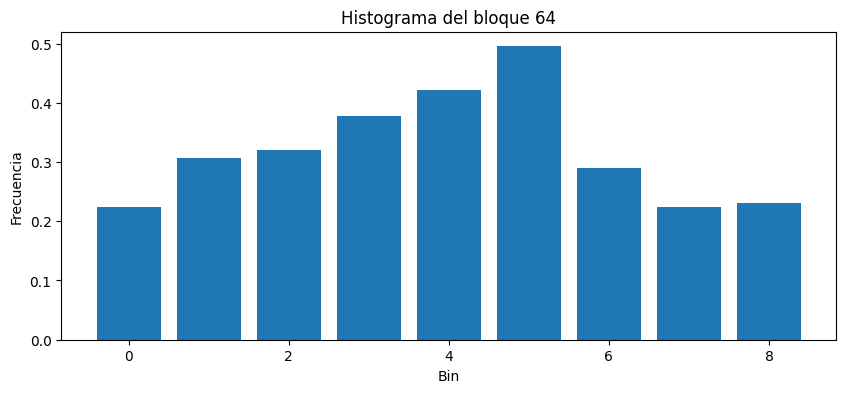

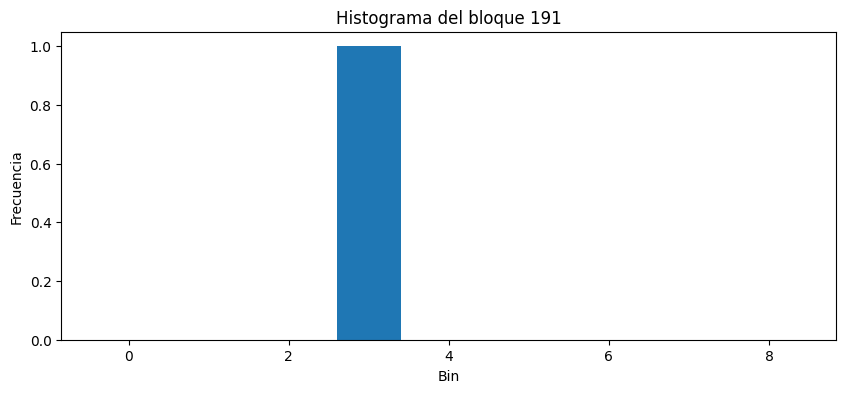

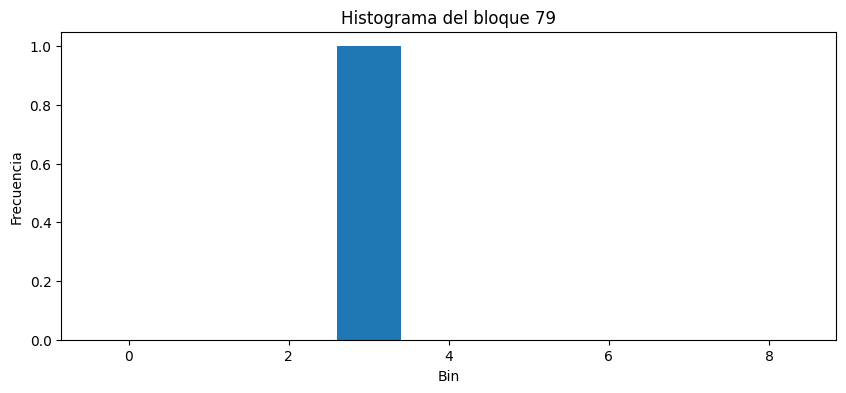

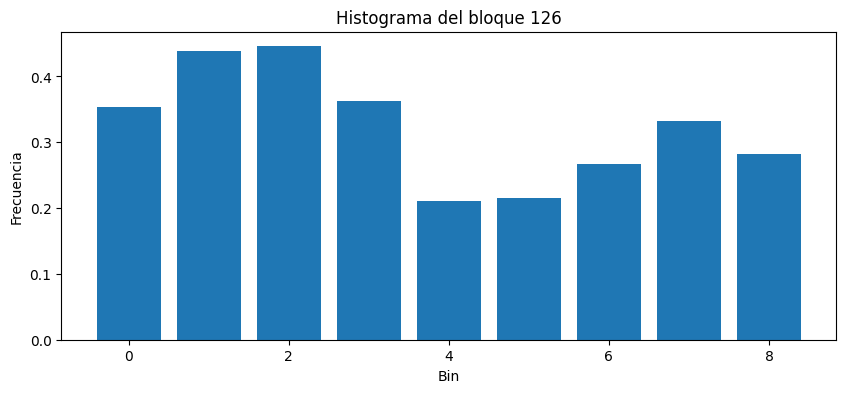

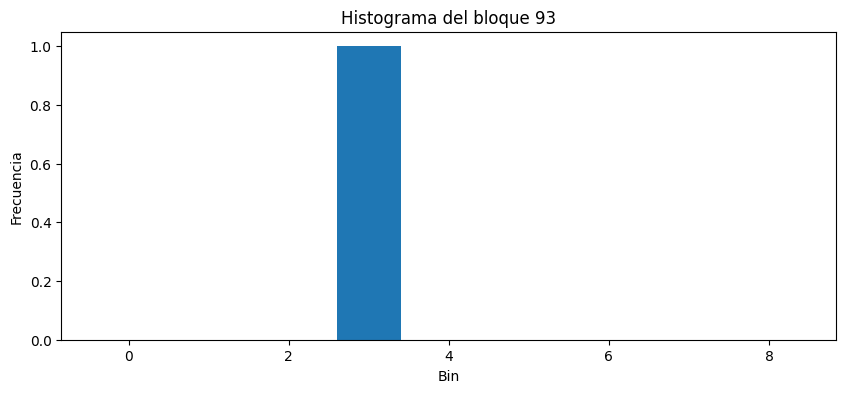

In [10]:
# Visualizar algunos histogramas normalizados
# Seleccionar bloques al azar para visualizar sus histogramas
blocksToShow = np.random.choice(len(normalizedHistograms), 5, replace=False)
for blockIndex in blocksToShow:
    plt.figure(figsize=(10, 4))
    plt.title(f"Histograma del bloque {blockIndex}")
    plt.bar(range(numBins), normalizedHistograms[blockIndex])
    plt.xlabel('Bin')
    plt.ylabel('Frecuencia')
    plt.show()